| Name | Admin No | Class | Group |
| --- | --- | --- | --- |
| Goh Rui Zhuo | 2222329 | DAAA/2B/05 | 1 |
| Toh Kien Yu | 2222291 | DAAA/2B/05 | 1 |
| Wang ZiXin| 2235189 | DAAA/2B/05 | 1 |

<a class="anchor" id="2"></a>
## <font color='#71a1e3'>__Background research__</font>

- Gobest Cab is a ride-hailing service company. The company hired your team as
their data science team to develop an easy to use, and intuitive machine learning
software application that may help them to visualize and analyse cab data.
- The company prefers the application to be portable and the application could run
on the manager’s laptop. The application could address query such as safe and
dangerous driver’s behaviour throughout the entire journey.
- The management of GoBest Cab would like data science team to build an
interactive dashboard for data visualization. The application could provide insights
such as driver’s behaviour - dangerous or safe drivers.

<a class="anchor" id="1"></a>
## <font color='#71a1e3'> __Users__</font>

- __Manager__:
- __Administrators__:
- __Cab Drivers__:

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Import Libraries__</font>


In [89]:
!pip install plotly
!pip install pyodbc
import pyodbc

In [90]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
import pandas as pd
import numpy as np
from math import atan2, degrees
from itertools import product
from termcolor import colored
import itertools
from tqdm import tqdm
plt.style.use("ggplot")
warnings.filterwarnings('ignore')
from collections import defaultdict
from datetime import datetime
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
random = np.random.RandomState(42)

<a class="anchor" id="4"></a>
## <font color='#71a1e3'>__Import dataset (ETL Pipeline)__</font>

Here is to import the dataset and proceed to do analysis on it

### Established connection with SQL server

In [91]:
server = 'RZ\SQLEXPRESS'
database = 'Practical_AI'

In [92]:
conn = pyodbc.connect('Driver={SQL Server};'
                      f'Server={server};'
                      f'Database={database};'
                      'Trusted_Connection=yes;')

### Sensors

In [93]:
sensors = pd.read_sql('Select * From Sensor',conn)
sensors = sensors.iloc[:,1:]
sensors

bookingID  accuracy     bearing  acceleration_x  acceleration_y  \
0        1202590843006     3.000  353.000000        1.228867        8.900100   
1         274877907034     9.293   17.000000        0.032775        8.659933   
2         884763263056     3.000         NaN        1.139675        9.545974   
3        1073741824054     3.900  126.000000        3.871543       10.386364   
4        1056561954943     3.900   50.000000       -0.112882       10.550960   
...                ...       ...         ...             ...             ...   
7469651   884763262985     3.900  226.000000        0.260422        9.907822   
7469652  1571958030347     5.000  341.782990       -1.168625       -9.396103   
7469653   584115552361     6.000   50.000000        6.186806        6.809318   
7469654  1073741824126    10.720  324.000000       -0.274582        8.512177   
7469655   884763263001    12.000  357.002563        0.989182       -9.599023   

         acceleration_z    gyro_x    gyro_y    gyro_z  second      speed  
0              3.986968  0.008221  0.002269 -0.009966  1362.0   0.000000  
1              4.737300  0.024629  0.004028 -0.010858   257.0   0.190000  
2              1.951334 -0.006899 -0.015080  0.001122   973.0   0.667059  
3             -0.136474  0.001344 -0.339601 -0.017956   902.0   7.913285  
4             -1.560110  0.130568 -0.061697  0.161530   820.0  20.419409  
...                 ...       ...       ...       ...     ...        ...  
7469651        3.162796  0.013733  0.010056  0.017792    98.0   9.980000  
7469652       -0.009271  0.032545  0.009954  0.038534   509.0   6.440000  
7469653        0.234639  0.505468  0.255951  0.202501   519.0   8.979280  
7469654        3.903046 -0.037451 -0.044601 -0.033173  2289.0   8.770000  
7469655       -6.042905  0.035069 -0.031591  0.021383   310.0  28.198130  

[7469656 rows x 11 columns]

### Drivers

In [94]:
drivers = pd.read_sql('Select * From Driver',conn)
drivers

id                 name date_of_birth  no_of_years_driving_exp  gender  \
0      1  Sinclair Birmingham    1982-10-17                       10    Male   
1      2        Juline Faulks    1977-11-30                       14  Female   
2      3        Germayne Stit    1976-09-18                       13    Male   
3      4       Athena Coudray    1982-10-24                       16  Female   
4      5   Batholomew Hiscoke    1978-09-11                       20    Male   
..   ...                  ...           ...                      ...     ...   
495  496  Mariquilla Tilmouth    1979-12-31                       10  Female   
496  497       Analiese Acedo    1978-11-10                        6  Female   
497  498        Gale Bewfield    1974-11-05                        8  Female   
498  499         Shalom Okroy    1978-10-17                        9    Male   
499  500     Farleigh Aughtie    1979-07-24                       21    Male   

          car_make  car_model_year  rating  
0             Audi            2010     4.0  
1              BMW            2000     3.0  
2    Mercedes-Benz            1999     4.0  
3            Lexus            2009     2.0  
4              BMW            2012     3.0  
..             ...             ...     ...  
495     Mitsubishi            1988     2.0  
496          Mazda            2000     5.0  
497            BMW            1993     5.0  
498  Mercedes-Benz            2010     4.0  
499     Volkswagen            2011     5.0  

[500 rows x 8 columns]

### Safety Labels

In [95]:
safety_labels = pd.read_sql('Select * From Safety_Labels',conn)
safety_labels

bookingID  driver_id  label
0                  0        359      0
1                  1        313      1
2                  2         27      1
3                  4        164      1
4                  6        118      0
...              ...        ...    ...
19995  1709396983957        112      1
19996  1709396983960        311      1
19997  1709396983966        426      1
19998  1709396983971        139      1
19999  1709396983975        178      1

[20000 rows x 3 columns]

<u><b>Things Observed</b></u>
- From the above, we can conclude that all the dataset are imported accurately

<a class="anchor" id="4"></a>
## <font color='#71a1e3'>__Data Understanding__</font>

### General Info

#### Sensors dataset

In [96]:
sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7469656 entries, 0 to 7469655
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bookingID       int64  
 1   accuracy        float64
 2   bearing         float64
 3   acceleration_x  float64
 4   acceleration_y  float64
 5   acceleration_z  float64
 6   gyro_x          float64
 7   gyro_y          float64
 8   gyro_z          float64
 9   second          float64
 10  speed           float64
dtypes: float64(10), int64(1)
memory usage: 626.9 MB


#### Drivers Dataset

In [97]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       500 non-null    int64         
 1   name                     500 non-null    object        
 2   date_of_birth            500 non-null    datetime64[ns]
 3   no_of_years_driving_exp  500 non-null    int64         
 4   gender                   500 non-null    object        
 5   car_make                 500 non-null    object        
 6   car_model_year           500 non-null    int64         
 7   rating                   500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 31.4+ KB


#### Safety Labels Dataset

In [98]:
safety_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   bookingID  20000 non-null  int64
 1   driver_id  20000 non-null  int64
 2   label      20000 non-null  int64
dtypes: int64(3)
memory usage: 468.9 KB


<u><b>Things Observed</b></u>
- From the above, we can conclude that there is `no anomaly` dtype in the dataset

### Data Distribution

#### Sensor Dataset

In [99]:
sensors.describe()

bookingID      accuracy       bearing  acceleration_x  \
count  7.469656e+06  7.326244e+06  7.277837e+06    7.271856e+06   
mean   8.183371e+11  1.162183e+01  1.689676e+02    6.926942e-02   
std    4.953348e+11  8.729841e+01  1.072922e+02    1.423953e+00   
min    0.000000e+00  7.500000e-01  0.000000e+00   -3.898399e+01   
25%    3.779571e+11  3.900000e+00  7.800000e+01   -5.086060e-01   
50%    8.074539e+11  4.247000e+00  1.688391e+02    6.145935e-02   
75%    1.254130e+12  8.000000e+00  2.629634e+02    6.353790e-01   
max    1.709397e+12  6.070101e+03  3.599995e+02    6.687346e+01   

       acceleration_y  acceleration_z        gyro_x        gyro_y  \
count    7.255720e+06    7.388977e+06  7.310108e+06  7.330417e+06   
mean     4.468600e+00    8.965228e-01 -1.747541e-03  2.087461e-04   
std      8.130292e+00    3.252053e+00  1.439998e-01  3.366481e-01   
min     -5.780019e+01   -7.844842e+01 -4.845575e+01 -5.734489e+01   
25%     -2.015598e+00   -9.291077e-01 -2.680721e-02 -2.995949e-02   
50%      9.081485e+00    7.778473e-01 -6.561279e-04  2.569950e-04   
75%      9.710288e+00    2.753332e+00  2.328969e-02  3.141595e-02   
max      6.115936e+01    7.805576e+01  3.070942e+01  8.031496e+01   

             gyro_z        second         speed  
count  7.299954e+06  7.346552e+06  7.356707e+06  
mean  -2.432760e-04  3.720742e+03  9.004574e+00  
std    1.478627e-01  1.389856e+06  8.105644e+00  
min   -5.355445e+01  0.000000e+00 -2.000000e+00  
25%   -1.872253e-02  2.410000e+02  1.018487e+00  
50%   -2.809980e-05  5.200000e+02  7.527316e+00  
75%    1.826120e-02  8.620000e+02  1.547720e+01  
max    4.505986e+01  6.193165e+08  8.803725e+01

#### Drivers Dataset

In [100]:
drivers.describe()

id               date_of_birth  no_of_years_driving_exp  \
count  500.000000                         500                500.00000   
mean   250.500000  1976-06-08 01:14:52.800000                 14.91400   
min      1.000000         1970-01-05 00:00:00                  5.00000   
25%    125.750000         1973-04-29 18:00:00                  9.75000   
50%    250.500000         1976-04-15 12:00:00                 15.00000   
75%    375.250000         1979-07-21 18:00:00                 20.00000   
max    500.000000         1982-12-29 00:00:00                 25.00000   
std    144.481833                         NaN                  6.03452   

       car_model_year     rating  
count      500.000000  500.00000  
mean      2000.652000    3.62000  
min       1953.000000    2.00000  
25%       1995.000000    3.00000  
50%       2002.000000    4.00000  
75%       2008.000000    4.00000  
max       2013.000000    5.00000  
std          8.728762    0.93453

#### Safety Labels Dataset

In [101]:
safety_labels.describe()

bookingID     driver_id         label
count  2.000000e+04  20000.000000  20000.000000
mean   8.162027e+11    249.615700      0.249650
std    4.945137e+11    144.573545      0.432821
min    0.000000e+00      1.000000      0.000000
25%    3.865471e+11    124.000000      0.000000
50%    7.988639e+11    250.000000      0.000000
75%    1.245541e+12    374.000000      0.000000
max    1.709397e+12    500.000000      1.000000

<u><b>Things Observed</b></u>
- Generally, all dataset columns does not show any anomaly but for speed column, we can see that the minimum is a -2 which could be something to take note of

### Checking for Null Values

#### Sensors dataset

In [102]:
sensors.isnull().sum()

bookingID              0
accuracy          143412
bearing           191819
acceleration_x    197800
acceleration_y    213936
acceleration_z     80679
gyro_x            159548
gyro_y            139239
gyro_z            169702
second            123104
speed             112949
dtype: int64

In [103]:
nan_df = sensors[sensors.isnull().any(axis=1)]
nan_df.head()

bookingID  accuracy     bearing  acceleration_x  acceleration_y  \
2    884763263056       3.0         NaN        1.139675        9.545974   
7    884763262976       3.0   48.000000        0.109022       10.043245   
8    841813590178      16.0   44.041702        1.306946       -7.427310   
10  1211180777477       3.9         NaN       -0.232245        8.609812   
15  1417339207759      10.0  274.846466        0.930264       -7.903732   

    acceleration_z    gyro_x    gyro_y    gyro_z  second      speed  
2         1.951334 -0.006899 -0.015080  0.001122   973.0   0.667059  
7        -0.196497 -0.000698 -0.001902       NaN     NaN   0.000000  
8        -5.655457  0.013766 -0.017083       NaN   115.0  13.914648  
10        3.622538  0.003625  0.009415 -0.031255   266.0   5.068833  
15       -3.305496 -0.003302       NaN -0.092565   368.0   3.110000

#### Drivers Dataset

In [104]:
drivers.isnull().sum()

id                         0
name                       0
date_of_birth              0
no_of_years_driving_exp    0
gender                     0
car_make                   0
car_model_year             0
rating                     0
dtype: int64

In [105]:
nan_df = drivers[drivers.isnull().any(axis=1)]
nan_df.head()

Empty DataFrame
Columns: [id, name, date_of_birth, no_of_years_driving_exp, gender, car_make, car_model_year, rating]
Index: []

#### Safety Labels Dataset

In [106]:
safety_labels.isnull().sum()

bookingID    0
driver_id    0
label        0
dtype: int64

In [107]:
nan_df = safety_labels[safety_labels.isnull().any(axis=1)]
nan_df.head()

Empty DataFrame
Columns: [bookingID, driver_id, label]
Index: []

<u><b>Things Observed</b></u>
- Sensors dataset contains the most number of null values
- Drivers and safety labels data dont have any null values

### Dropping NAN values for Seconds

As we do not know the increasing of time no imputation can be done accurately

In [108]:
sensors = sensors.dropna(subset=['second'])
print(sensors.isnull().sum())

bookingID              0
accuracy          140045
bearing           188877
acceleration_x    194105
acceleration_y    210037
acceleration_z     79046
gyro_x            156973
gyro_y            136729
gyro_z            166365
second                 0
speed             111826
dtype: int64


<a class="anchor" id="4"></a>
## <font color='#71a1e3'>__Exploratory data analysis (Before)__</font>

To check for null values in the dataset

### Check for null values with the use of heatmap

- This helps us to see where is likely the null values
- Allows us to identify what to do in the next step

In [109]:
class EDABefore:
    def __init__(self):
        pass

    def plotNull(self,df):
        #Checking for null values
        %matplotlib inline
        fig, ax = plt.subplots(figsize=(10, 8),)
        fig.set_facecolor('#4287f5')
        sns.heatmap(df.isnull(),yticklabels=False,cmap="mako",ax=ax)
        plt.xticks(rotation=90)
        plt.title('Checking for null values')
        ax.tick_params(axis='x', colors='white')
        for label in ax.get_xticklabels():
            label.set_color('white')
        plt.xlabel('Columns')
        plt.show()
func = EDABefore()

#### Sensors

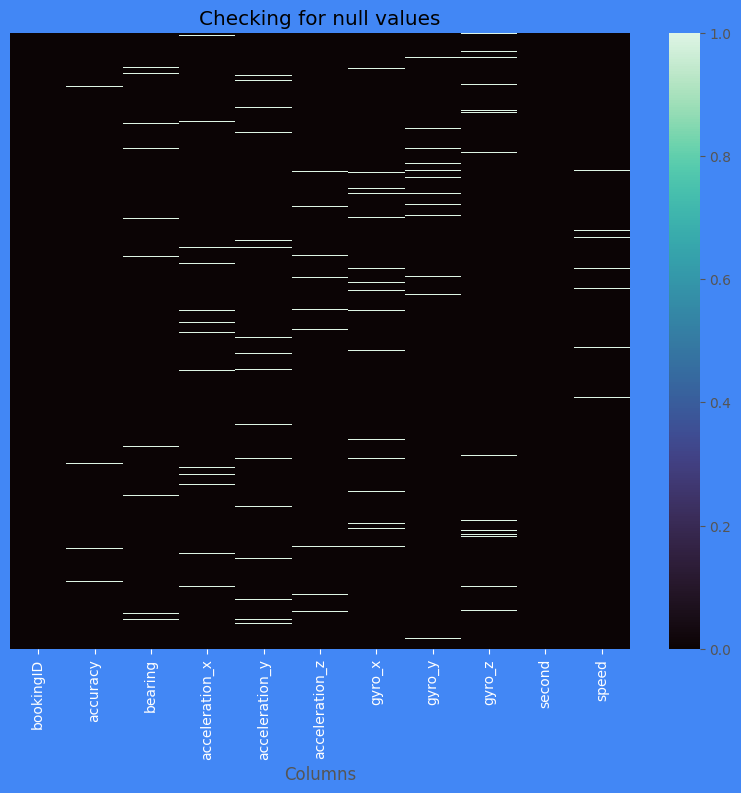

In [110]:
func.plotNull(sensors)

<u><b>Things Observed</b></u>
- For sensor dataset, majority of the null values can be seen in almost all columns

### Correlation Plot

- This helps us identify the correlation between each variable
- Tells us what we should do for the next steps

In [111]:
sensors_mat = sensors.drop('bookingID',axis=1).corr()
drivers_mat = drivers.drop('id',axis=1)[['no_of_years_driving_exp','car_model_year','rating']].corr()
arr = [sensors_mat , drivers_mat]
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Correlation for Sensors", "Correlation for Drivers"),
    shared_yaxes=False  
)

for i, matrix in enumerate(arr, start=1):
    heatmap = go.Heatmap(
        z=matrix.values,
        x=matrix.columns,
        y=matrix.columns,
        text=matrix.round(2).astype(str),
        coloraxis="coloraxis"  
    )
    fig.add_trace(heatmap, row=i, col=1)
    fig.update_traces(colorscale='Plasma')


fig.update_layout(
    title_text="Correlation Matrix for both Datasets",
    title_font=dict(size=20, color='blue'),
    height=800, width=700,  
    paper_bgcolor='#93bcf5',
    title_x=0.5,
    title_xanchor='center',
    coloraxis=dict(
        colorbar=dict(
            title="Correlation",
            titleside="right",
            tickmode="array",
            tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1],
            ticktext=["0", "0.2", "0.4", "0.6", "0.8", "1"],
            ticks="outside",
            ticklen=5,
            tickfont=dict(size=12),
        ),
    )
)

for i in range(1, 3):
    fig.update_xaxes(title_text="Features", row=i, col=1)
    fig.update_yaxes(title_text="Features", row=i, col=1)  
fig.show()


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that accelearation z and y has a moderate correlation

<a class="anchor" id="4"></a>
## <font color='#71a1e3'>__Data Preprocessing - Part 2__</font>

### Create the function for imputing

**Stochastic Impute**

1. Aims to reduce the bias by an extra step of augmenting the predicted score with a residual term
2. Residual term is normally distributed with mean zero and variance equal to residual variance
3. Useful when missing values occurs at random

In [112]:
def stochastic_impute(group, column):
    Observed = group[column].dropna().values
    if len(Observed) == 0:
        return group
    randomIdx = np.random.choice(len(Observed), size=len(group))
    group[column] = group[column].fillna(pd.Series(Observed[randomIdx], index=group.index))
    return group

### Imputing missing values in speed

For speed, we will utilise the stochastic impute method as the missing values occurs at random and not fix place

In [113]:
sensorNA = sensors[sensors['speed'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['speed'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsSpeed = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'speed'))
sensors = sensorsSpeed.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 111826
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `112949` null values and it is imputed here for the speed columns

### Imputing missing values in gyro-x

For gyro-x, we will utilise the stochastic impute method as the missing values occurs at random and not fix place

In [114]:
sensorNA = sensors[sensors['gyro_x'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['gyro_x'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsgyro_x = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'gyro_x'))
sensors = sensorsgyro_x.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 156973
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `159548` null values and it is imputed here for the gyro-x column

### Imputing missing values in gyro-y

For gyro-y, we will utilise the stochastic impute method as the missing values occurs at random and not fix place

In [115]:
sensorNA = sensors[sensors['gyro_y'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['gyro_y'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsgyro_y = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'gyro_y'))
sensors = sensorsgyro_y.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 136729
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `139239` null values and it is imputed here for the gyro-y column

### Imputing missing values in gyro-z

For gyro-z, we will utilise the stochastic impute method as the missing values occurs at random and not fix place

In [116]:
sensorNA = sensors[sensors['gyro_z'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['gyro_z'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsgyro_z = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'gyro_z'))
sensors = sensorsgyro_z.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 166365
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `169702` null values and it is imputed here for the gyro-z column

### Imputing missing values in accuracy

For accuracy, we will utilise the stochastic impute method as the missing values occurs at random and not fix place

In [117]:
sensorNA = sensors[sensors['accuracy'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['accuracy'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsaccuracy = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'accuracy'))
sensors = sensorsaccuracy.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 140045
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `143412` null values and it is imputed here for the gyro-z column

### Imputing missing values in bearing

For bearing, we will utilise the stochastic impute method as the missing values occurs at random and not fix place

In [118]:
sensorNA = sensors[sensors['bearing'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['bearing'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsbearing = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'bearing'))
sensors = sensorsbearing.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 188877
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `191819` null values and it is imputed here for the gyro-z column

### Imputing missing values in acceleartion_x

For acceleration_x, we will utilise the stochastic impute method as the missing values occurs at random and not fix place

In [119]:
sensorNA = sensors[sensors['acceleration_x'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['acceleration_x'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsacceleration_x = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'acceleration_x'))
sensors = sensorsacceleration_x.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 194105
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `197800` null values and it is imputed here for the gyro-z column

### Imputing missing values in acceleartion_y 

For acceleration_y , same will be utilise

In [120]:
sensorNA = sensors[sensors['acceleration_y'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['acceleration_y'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsacceleration_y = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'acceleration_y'))
sensors = sensorsacceleration_y.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 210037
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `197800` null values and it is imputed here for the gyro-z column

### Imputing missing values in acceleartion_z

For acceleration_z , same will be utilise

In [121]:
sensorNA = sensors[sensors['acceleration_z'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['acceleration_z'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsacceleration_z = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'acceleration_z'))
sensors = sensorsacceleration_z.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 79046
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `80679` null values and it is imputed here for the gyro-z column

In [122]:
sensors.isnull().sum()

bookingID         0
accuracy          0
bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
speed             0
dtype: int64

<a class="anchor" id="4"></a>
## <font color='#71a1e3'>__Exploratory Data Analysis (After)__</font>

### Numeric Analyser

This is the class to define numeric analyser to analyse the numeric columns

In [123]:
class NumericAnalyser:
    def __init__(self, data):
        self.data = data

    def combined_numPlot(self, cols):
        total_rows = len(cols)
        total_cols = 2  

        fig = make_subplots(rows=1, cols=len(cols), subplot_titles=[f'Boxplot of {col}' for col in cols])

        for i, col in enumerate(cols, 1):
            fig.add_trace(
                go.Box(y=self.data[col], name=col),
                row=1, col=i
            )
        for i, annotation in enumerate(fig['layout']['annotations']):
            annotation['x'] = (i + 0.5) / len(cols)  
            annotation['xanchor'] = 'center'
        fig.update_layout(paper_bgcolor='#93bcf5')
        letters = ','.join(cols)
        fig.update_layout(title_text=f'Numerical Analysis for {letters}', title_font=dict(size=20, color='darkblue'), showlegend=False, height=500, width=1600,    title_x=0.5,  
    title_xanchor='center')
        fig.show()

    def ratio(self, col1, col2):
        fig = go.Figure()
        fig.add_trace(go.Histogram(x=self.data[col1], name=col1, opacity=0.75))
        fig.add_trace(go.Histogram(x=self.data[col2], name=col2, opacity=0.75))
        fig.update_layout(title_text=f'{col1} vs {col2}', barmode='overlay')
        fig.show()

    def numTarget(self, cols, target):
        for col in cols:
            fig = px.box(self.data, x=col, y=target)
            fig.update_layout(title_text=f'Analysis on {col}')
            fig.show()

#### Sensors dataset

Here is to analyse the sensor dataset alone and gain insights of the data

In [124]:
sensorsById = sensors.groupby('bookingID').mean()
sensor_analyser = NumericAnalyser(sensorsById)
sensorsById

accuracy     bearing  acceleration_x  acceleration_y  \
bookingID                                                              
0               9.924276  178.868428       -0.713117       -9.597520   
1               3.724381  126.907928       -0.488038        9.528017   
2               3.853383  172.728395        0.287461        9.756286   
4              10.000000  150.507867       -0.374852       -9.367844   
6               4.640200  196.198058        0.572594        9.521264   
...                  ...         ...             ...             ...   
1709396983957   4.078243  170.046053        0.142150        1.924813   
1709396983960  11.883582  179.609613        0.548763       -8.713000   
1709396983966   9.388419  195.363636       -0.202719        9.062210   
1709396983971   5.204638  203.696466        0.733181        8.900386   
1709396983975  34.548913  104.027277       -0.313199       -8.977707   

               acceleration_z    gyro_x    gyro_y    gyro_z      second  \
bookingID                                                                 
0                   -1.524831  0.002172 -0.002847 -0.001242  928.942094   
1                   -2.220957 -0.001029 -0.004155  0.002491  577.751918   
2                    0.094559 -0.001159 -0.011785  0.004019  320.777778   
4                   -2.649977 -0.023944  0.023411  0.002279  541.207039   
6                    2.314315  0.007084 -0.010078  0.001758  540.685437   
...                       ...       ...       ...       ...         ...   
1709396983957        9.787612  0.031841 -0.017673 -0.005492  541.723684   
1709396983960       -4.470691 -0.013311  0.005513 -0.005886  425.289552   
1709396983966        3.336205  0.001137 -0.005307 -0.001346  584.032258   
1709396983971        3.759544  0.001467  0.001311 -0.000533  524.492723   
1709396983975       -4.077286 -0.006537  0.010601 -0.000840  303.429348   

                   speed  
bookingID                 
0               9.179014  
1               7.603200  
2               2.851901  
4               6.006957  
6               4.660083  
...                  ...  
1709396983957   2.393496  
1709396983960   7.722453  
1709396983966  12.714135  
1709396983971   6.011660  
1709396983975   4.578828  

[20000 rows x 10 columns]

##### Analysing on acceleration

In [125]:
cols = [ 'acceleration_x', 'acceleration_y', 'acceleration_z']
sensor_analyser = NumericAnalyser(sensorsById)
sensor_analyser.combined_numPlot(cols)

<u><b>Things Observed</b></u>
- For the acceleration data, we can see that x is symmetrical, y is negatively skewed and z is symmetrical, all contains outliers

##### Analysing on gyro

In [126]:
cols = [ 'gyro_x', 'gyro_y', 'gyro_z']
sensor_analyser = NumericAnalyser(sensorsById)
sensor_analyser.combined_numPlot(cols)

<u><b>Things Observed</b></u>
- For the acceleration data, we can see that x is symmetrical, y is symmetrical and z is symmetrical, all contains outliers

#### Analysing on other columns

In [127]:
cols = [ 'bearing', 'accuracy', 'speed']
sensor_analyser = NumericAnalyser(sensorsById)
sensor_analyser.combined_numPlot(cols)

<u><b>Things Observed</b></u>
- For the acceleration data, we can see that bearing is symmetrical, accuracy is symmetrical and speed is symmetrical, all contains outliers

#### Analyse on seconds data

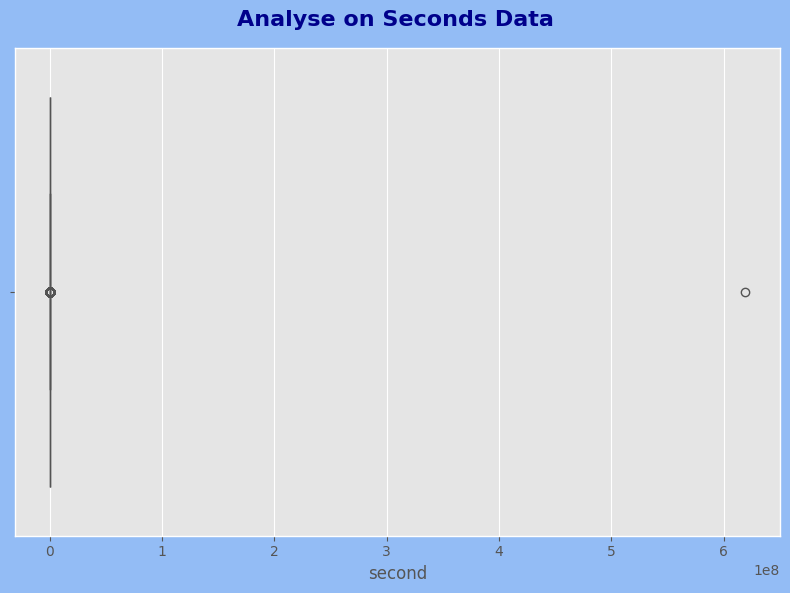

In [156]:
fig,ax = plt.subplots(1,1, figsize=(8,6))
fig.set_facecolor('#93bcf5')
plt.suptitle('Analyse on Seconds Data', fontsize=16, fontweight='bold', color='darkblue')
sns.boxplot(x = 'second',data = sensors)
plt.tight_layout()
plt.show()

<u><b>Things Observed</b></u>
- For the speed, we can see that there is a extreme outlier

### Driver

This is to analyse the driver dataset and gain insights on it

#### Analyse on the ratings of the drivers

In [157]:
fig = make_subplots(rows=2, cols=2,subplot_titles=[f"Number of Years Driving (Rating= {r})" for r in range(2, 6)],
    vertical_spacing=0.1, 
    horizontal_spacing=0.1
)

rating = 2

for row in range(1, 3): 
    for col in range(1, 3):  
        ratings = drivers[drivers['rating'] == rating]
        fig.add_trace(
            go.Histogram(x=ratings['no_of_years_driving_exp'],marker_color = '#e06960', nbinsx=20), 
            row=row, col=col
        )
        rating += 1

for i in range(2, 7):
    fig.update_yaxes(title_text="Count", row=(i+1)//3, col=((i-1)%2)+1)
    fig.update_xaxes(title_text="Years", row=(i+1)//3, col=((i-1)%2)+1)

fig.update_layout(
    title_text='Visualisation On the Ratings',
    title_font=dict(size=20, color='darkblue'),
    showlegend=False,
    plot_bgcolor='#a4c4f0',
    paper_bgcolor='#93bcf5',
    height=800, 
    width=1000, 
    title_x=0.5,  
    title_xanchor='center'
)

fig.show()

<u><b>Things Observed</b></u>
- For the rating 2, we can see that 15 to 16 has the highest count
- For the rating 3, we can see that 15 to 16 has the highest count
- For the rating 4, we can see that 23 to 24 has the highest count
- For the rating 5, we can see that 12 to 13 has the highest count

### Analyse the Years Of Experience with respect to Rating

In [161]:
CarMakesC = drivers['car_make'].value_counts()
GenderCount = drivers['gender'].value_counts()

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Car Make', 'Gender'),
    vertical_spacing=0.15
)

fig.add_trace(
    go.Bar(
        x=CarMakesC.index,
        y=CarMakesC.values,
        text=CarMakesC.values,
        textposition='outside',
        name='Car Make',
        marker_color='blue'  
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=GenderCount.index,
        y=GenderCount.values,
        text=GenderCount.values,
        textposition='outside',
        name='Gender',
        marker_color='purple'  
    ),
    row=2, col=1
)

fig.update_layout(
    title_text='Analysis on Car Make and Gender',
    title_font_size=16,     title_font=dict(size=20, color='darkblue'),
    showlegend=False,
    plot_bgcolor='#a4c4f0',
    paper_bgcolor='#93bcf5',
    height=900,  
    width=600,  
    title_x=0.5,
    title_xanchor='center'
)

fig.update_xaxes(title_text='Car Make', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_xaxes(title_text='Gender', row=2, col=1)
fig.update_yaxes(title_text='Count', row=2, col=1)

fig.show()

<u><b>Things Observed</b></u>
- For the car make, we can see that Toyota has the highest count and Mitsubishi has the lowest count
- For the gender, the male has a higher count than the female

### Safety Labels Dataset

In [131]:
label_counts = safety_labels['label'].value_counts()

fig = go.Figure(data=[go.Bar(x=label_counts.index, y=label_counts.values)])

fig.update_layout(
    title='Count of Labels',   
    title_font_size=16,     
    title_font=dict(size=20, color='darkblue'),   
     title_x=0.5,
    title_xanchor='center',
    xaxis_title='Label',
    yaxis_title='Count',
    plot_bgcolor='#a4c4f0',
    paper_bgcolor='#93bcf5',
    bargap=0.2)

fig.show()

<u><b>Things Observed</b></u>
- From the above chart, we can see that there is more 0 labels as compared to 1 label in the dataset

### Merge Dataset

Here we will continue to do data analysis with merged dataset

In [132]:
drivers = drivers.rename(columns = {'id':"driver_id"})
safety_sensor = pd.merge(sensors, safety_labels, on='bookingID')
safety_sensor_driver = pd.merge(safety_sensor, drivers, on='driver_id')
safety_sensor_driver

bookingID  accuracy     bearing  acceleration_x  acceleration_y  \
0                    0       8.0  286.468414       -1.467249       -8.900690   
1                    0      16.0  236.383453       -1.051239       -8.535971   
2                    0       8.0  355.459412        0.103629       -9.544144   
3                    0      16.0  144.299423       -0.942676       -9.370532   
4                    0      16.0  144.299423       -0.636575       -9.567172   
...                ...       ...         ...             ...             ...   
7346547  1649267441736       3.9  150.000000       -0.342639        8.790235   
7346548  1649267441736       3.9  146.000000       -0.654153       10.742343   
7346549  1649267441736       4.0  112.000000        0.852298        8.922347   
7346550  1649267441736       3.9  163.000000        0.271876       10.565545   
7346551  1649267441736       3.9  135.000000        0.678335        9.663401   

         acceleration_z    gyro_x    gyro_y    gyro_z  second      speed  \
0             -0.949854  0.128197  0.189890 -0.152818  1172.0  15.456474   
1             -2.123114  0.068428  0.011427  0.056763   246.0   3.824497   
2             -3.158203  0.041970  0.078962 -0.007944  1232.0   9.091736   
3             -1.716675 -0.006554 -0.011807 -0.000954    76.0   0.137619   
4             -1.228439 -0.013051 -0.030592  0.006250    78.0   0.137619   
...                 ...       ...       ...       ...     ...        ...   
7346547       -1.607132  0.001326  0.087127  0.017157   305.0  21.197744   
7346548       -3.034306 -0.042359 -0.034174 -0.026948   322.0  23.653850   
7346549       -2.832609 -0.120026  0.066898  0.006004   380.0  20.766455   
7346550       -1.723174  0.083741 -0.036792  0.043912   276.0  22.723602   
7346551       -1.859778  0.101299 -0.063408 -0.025813    28.0   4.440657   

         driver_id  label            name date_of_birth  \
0              359      0   Jemmie Cardew    1970-05-12   
1              359      0   Jemmie Cardew    1970-05-12   
2              359      0   Jemmie Cardew    1970-05-12   
3              359      0   Jemmie Cardew    1970-05-12   
4              359      0   Jemmie Cardew    1970-05-12   
...            ...    ...             ...           ...   
7346547        169      0  Marylou Yurkin    1981-12-08   
7346548        169      0  Marylou Yurkin    1981-12-08   
7346549        169      0  Marylou Yurkin    1981-12-08   
7346550        169      0  Marylou Yurkin    1981-12-08   
7346551        169      0  Marylou Yurkin    1981-12-08   

         no_of_years_driving_exp  gender       car_make  car_model_year  \
0                              9  Female  Mercedes-Benz            2003   
1                              9  Female  Mercedes-Benz            2003   
2                              9  Female  Mercedes-Benz            2003   
3                              9  Female  Mercedes-Benz            2003   
4                              9  Female  Mercedes-Benz            2003   
...                          ...     ...            ...             ...   
7346547                       21  Female           Audi            2006   
7346548                       21  Female           Audi            2006   
7346549                       21  Female           Audi            2006   
7346550                       21  Female           Audi            2006   
7346551                       21  Female           Audi            2006   

         rating  
0           5.0  
1           5.0  
2           5.0  
3           5.0  
4           5.0  
...         ...  
7346547     5.0  
7346548     5.0  
7346549     5.0  
7346550     5.0  
7346551     5.0  

[7346552 rows x 20 columns]

<u><b>Things Observed</b></u>
- Here, we can see that the dataframe are merge together already

#### Violin Plot Distribution by Labels

In [133]:
cols = ['accuracy', 'bearing', 'acceleration_x', 'acceleration_y','acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z',  'speed']

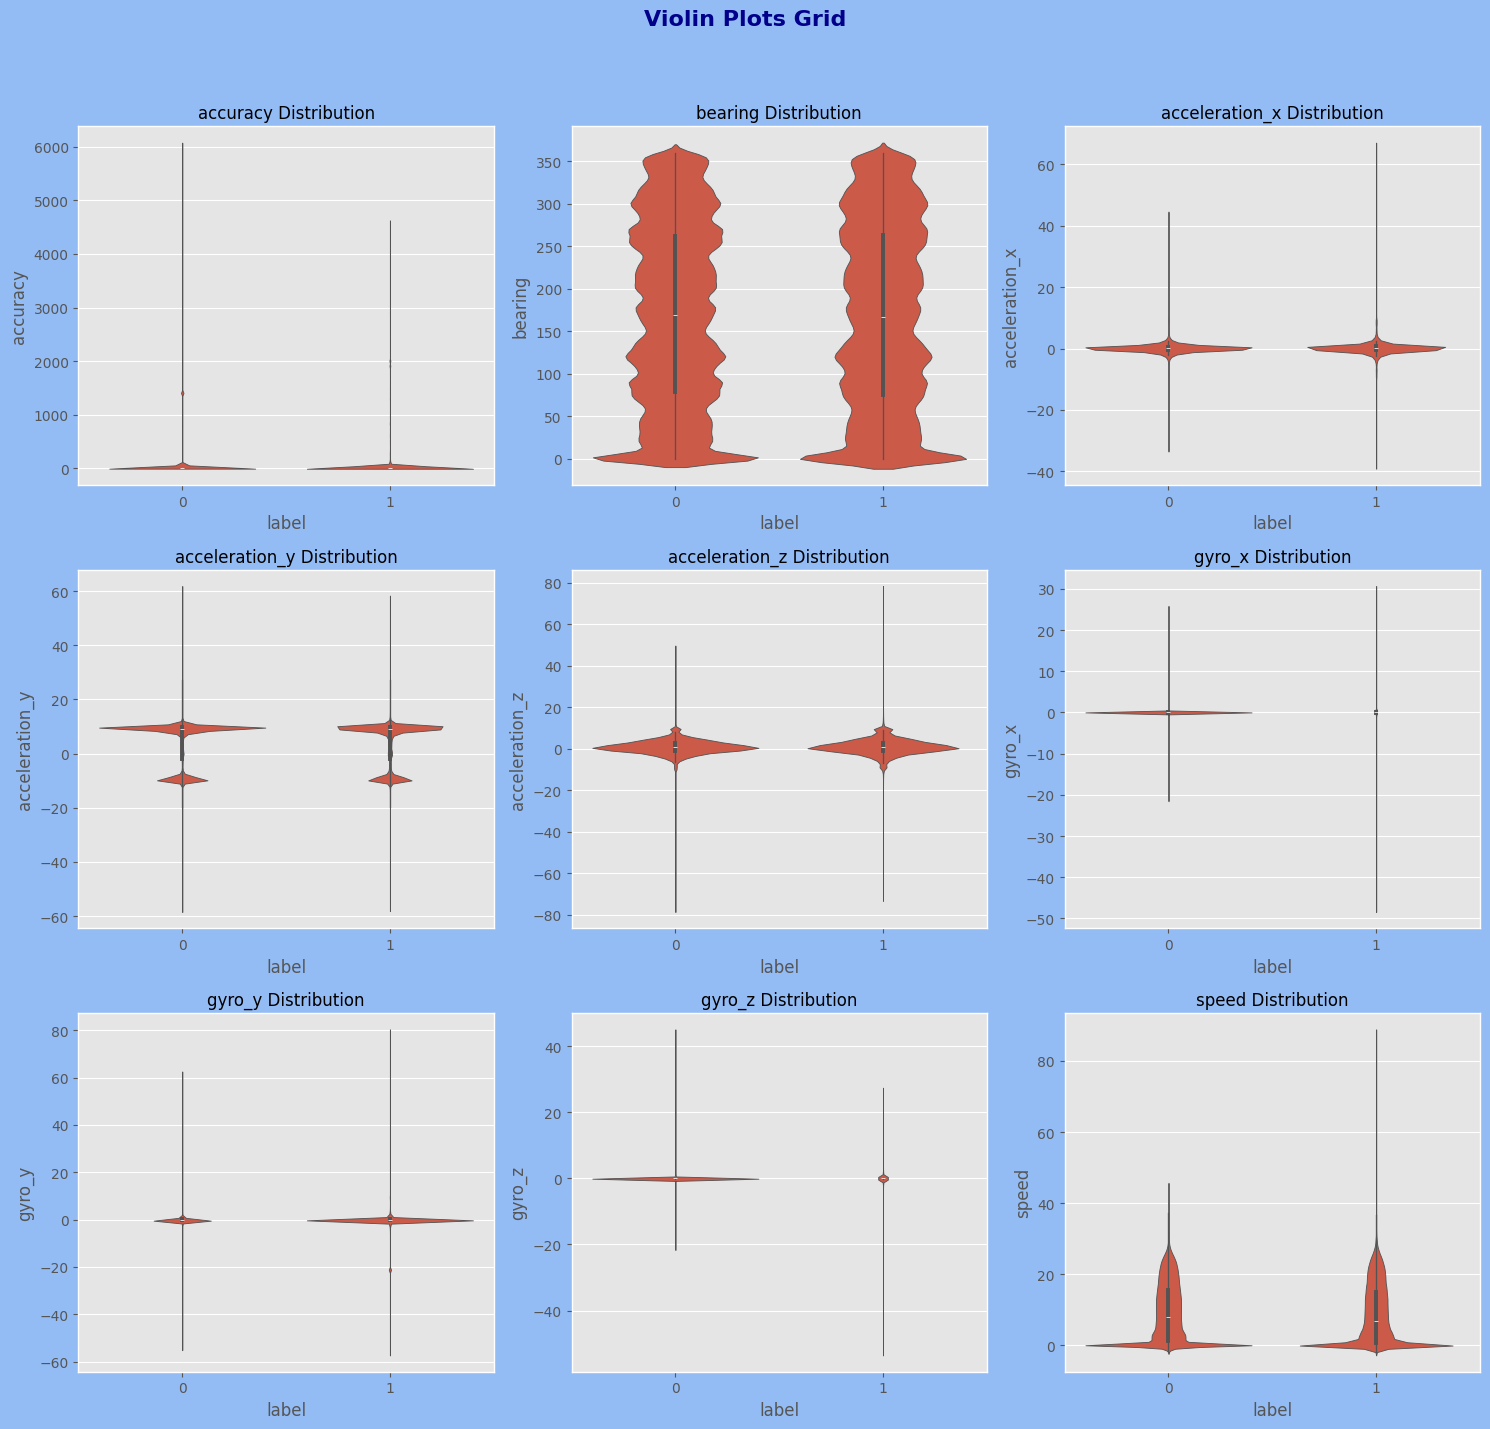

In [134]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.set_facecolor('#93bcf5')
axes = axes.flatten()
plt.suptitle('Violin Plots Grid', fontsize=16, fontweight='bold', color='darkblue')  

for i, ax in enumerate(axes):
    if i < len(cols):
        sns.violinplot(x='label', y=cols[i], data=safety_sensor_driver, ax=ax)
        ax.set_title(f'{cols[i]} Distribution', fontsize=12)  
    else:
        ax.axis('off') 
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

#### Rating Plot

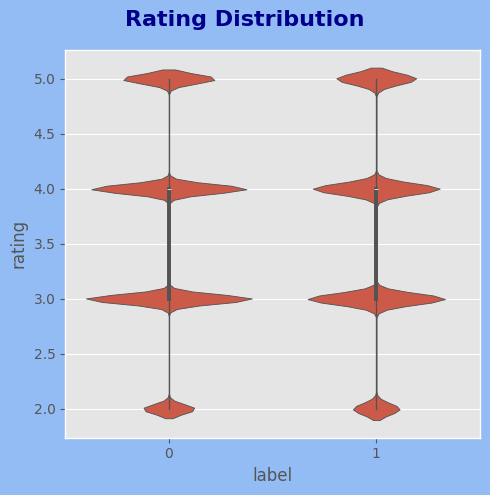

In [170]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
fig.set_facecolor('#93bcf5')
sns.violinplot(x='label', y='rating', data=safety_sensor_driver)
plt.suptitle('Rating Distribution', fontsize=16, fontweight='bold', color='darkblue')  
plt.tight_layout()
plt.show()

<u><b>Things Observed</b></u>
- Here, we can see the distribution of the different columns above

#### Get the Top 5 Driver who has the most dangerous trip

This is so that we know who has been driving dangerously here

In [172]:
safety_driver = pd.merge(safety_labels, drivers, on='driver_id')
dangerous_trips_count = safety_driver[safety_driver['label'] == 1].groupby('driver_id').size()
top_5_dangerous_drivers = dangerous_trips_count.sort_values(ascending=False).head(5)
top_5_dangerous_drivers_df = top_5_dangerous_drivers.reset_index()
top_5_dangerous_drivers_df.columns = ['driver_id', 'Number of Dangerous Trips']

fig = px.bar(top_5_dangerous_drivers_df, x='driver_id', y='Number of Dangerous Trips',
             title='Top 5 Drivers with the Most Dangerous Trips',
             labels={'driver_id': 'Driver ID', 'Number of Dangerous Trips': 'Number of Dangerous Trips'},
             text='Number of Dangerous Trips')  

fig.update_layout(
    xaxis_title="Driver ID",
    yaxis_title="Number of Dangerous Trips",
    xaxis={'type': 'category'}, 
    yaxis=dict(title='Number of Dangerous Trips'),
    showlegend=False
)

fig.show()

<a class="anchor" id="4"></a>
## <font color='#71a1e3'>__Data Preprocessing - Part 3__</font>

### Detect and see whether we need to drop outlier 

In [137]:
def outlierDetection(df, var: str, sort: bool = True):  
    #fdetect outlier
    Q3 = df[var].quantile(0.75)
    Q1 = df[var].quantile(0.25)
    IQR = Q3 - Q1
    UpperFence = Q3 + 1.5 * IQR
    LowerFence = Q1 - 1.5 * IQR
    mask = (df[var] > UpperFence) | (df[var] < LowerFence)
    outlier = df[mask]
    non_outlier = df[~mask]
    if len(outlier) == 0:
        print("No Outliers")
    else:
        #print outlier if there is
        print("Outliers in Series (First 5)")
        print("No. of Outliers:", len(outlier))
    if sort:
        return outlier.sort_values(var),non_outlier.sort_values(var)
    else:
        return outlier,non_outlier

#### Check on the Outlier of seconds

In [138]:
outlier,non_outlier = outlierDetection(sensors,'second')
outlier

Outliers in Series (First 5)
No. of Outliers: 112738


bookingID  accuracy     bearing  acceleration_x  acceleration_y  \
2613060   558345748621    11.000  311.084503       -0.941180       -4.363165   
2075981   438086664214     3.000   33.000000        0.957710        9.153313   
6552473  1494648619208     4.000  178.000000        3.936188        6.493273   
4897000  1099511627861     8.000  295.771057       -0.334064      -10.462894   
5611039  1288490188930     8.000  114.557770       -0.246735       -9.788486   
...                ...       ...         ...             ...             ...   
6385462  1460288880770     4.324    0.000000        0.574608        9.002198   
6385403  1460288880770     4.503    0.000000        1.110910        9.615114   
6385208  1460288880770     5.131    0.000000        0.344765        9.768343   
6384938  1460288880770     5.297    0.000000        0.651223        9.385271   
6384928  1460288880770     5.994    0.000000       -0.114922        9.270349   

         acceleration_z    gyro_x    gyro_y    gyro_z       second      speed  
2613060       -7.113583 -0.201332 -0.044072  0.235682       1794.0   3.390363  
2075981       -1.106155 -0.088094 -0.249648 -0.034139       1794.0   1.015793  
6552473        6.924243 -0.069674 -0.069564 -0.140310       1794.0  13.853265  
4897000        0.093909  0.023025  0.047670  0.040970       1794.0  15.971873  
5611039       -0.809290  0.091587  0.018635  0.001829       1794.0  19.880865  
...                 ...       ...       ...       ...          ...        ...  
6385462        0.919373  0.070860  0.177151  0.002443  619316307.0  -1.000000  
6385403        0.497994  0.087965 -0.020769  0.064752  619316388.0  -1.000000  
6385208        0.000000  0.134390 -0.134390  0.015882  619316468.0  -1.000000  
6384938        1.455675  0.106291 -0.467923 -0.046426  619316508.0  -1.000000  
6384928        0.804452 -0.202807 -0.043982 -0.012217  619316528.0  -1.000000  

[112738 rows x 11 columns]

In [186]:
ids = sensors[sensors['second'] > 3600]['bookingID']
sensors = sensors[~sensors['bookingID'].isin(ids)]
sensors

bookingID  total_duration  accuracy     bearing  acceleration_x  \
0                    0       26.483333       8.0  286.468414       -1.467249   
1                    0       26.483333      16.0  236.383453       -1.051239   
2                    0       26.483333       8.0  355.459412        0.103629   
3                    0       26.483333      16.0  144.299423       -0.942676   
4                    0       26.483333      16.0  144.299423       -0.636575   
...                ...             ...       ...         ...             ...   
7236548  1709396983975        9.266667      32.0  122.888580       -0.528311   
7236549  1709396983975        9.266667       6.0   24.368900       -0.225949   
7236550  1709396983975        9.266667       6.0  198.527954        0.179144   
7236551  1709396983975        9.266667      32.0  114.740768        1.481604   
7236552  1709396983975        9.266667       6.0   24.368900       -0.345129   

         acceleration_y  acceleration_z    gyro_x    gyro_y    gyro_z  second  \
0             -8.900690       -0.949854  0.128197  0.189890 -0.152818  1172.0   
1             -8.535971       -2.123114  0.068428  0.011427  0.056763   246.0   
2             -9.544144       -3.158203  0.041970  0.078962 -0.007944  1232.0   
3             -9.370532       -1.716675 -0.006554 -0.011807 -0.000954    76.0   
4             -9.567172       -1.228439 -0.013051 -0.030592  0.006250    78.0   
...                 ...             ...       ...       ...       ...     ...   
7236548       -9.030188       -4.752707 -0.011474  0.014938 -0.037461    95.0   
7236549       -8.891718       -3.861621 -0.012920  0.011622 -0.000163   380.0   
7236550       -8.934634       -4.572067 -0.015760 -0.018210 -0.006609   554.0   
7236551       -8.640347       -2.629593 -0.017021  0.032282  0.154519   299.0   
7236552       -9.047833       -3.934744  0.001009  0.019218 -0.011708   355.0   

             speed  median_speed  mean_speed  std_speed  max_speed  \
0        15.456474      8.821684    9.201735   7.061409  22.882523   
1         3.824497      8.821684    9.201735   7.061409  22.882523   
2         9.091736      8.821684    9.201735   7.061409  22.882523   
3         0.137619      8.821684    9.201735   7.061409  22.882523   
4         0.137619      8.821684    9.201735   7.061409  22.882523   
...            ...           ...         ...        ...        ...   
7236548   5.638845      2.960753    5.456002   4.249355  16.633823   
7236549   2.954595      2.960753    5.456002   4.249355  16.633823   
7236550   1.035811      2.960753    5.456002   4.249355  16.633823   
7236551   3.540994      2.960753    5.456002   4.249355  16.633823   
7236552   2.954595      2.960753    5.456002   4.249355  16.633823   

             distance       pitch        roll       yaw  
0        18114.987885  -96.091371 -122.917831 -8.755844  
1          940.826317 -103.967497 -153.658140  3.252274  
2        11201.018555 -108.309628  178.120657 -0.455139  
3           10.459033 -100.381427 -151.227538 -0.054688  
4           10.734271  -97.316829 -152.606881  0.358078  
...               ...         ...         ...       ...  
7236548    535.690317 -117.758423 -173.657038 -2.146347  
7236549   1122.746224 -113.475025 -176.651358 -0.009354  
7236550    573.839397 -117.099918  177.756165 -0.378647  
7236551   1058.757327 -106.927040  150.601578  8.853271  
7236552   1048.881341 -113.503379 -174.987227 -0.670822  

[7219422 rows x 20 columns]

In [187]:
outlier,non_outlier = outlierDetection(sensors,'second')
outlier

Outliers in Series (First 5)
No. of Outliers: 101516


bookingID  total_duration  accuracy  bearing  acceleration_x  \
2827801   618475290714       33.983333     3.000    179.0        1.282976   
2645178   575525617805       34.866667     7.218      0.0        0.232836   
6516162  1511828488217       30.966667     3.000      0.0        0.156723   
6045513  1400159338657       41.983333     3.277     46.0        0.227456   
4750304  1073741824147       31.733333     3.900    122.0        1.801193   
...                ...             ...       ...      ...             ...   
2042084   438086664206       55.633333     3.730     60.0        4.571527   
2042426   438086664206       55.633333     3.786     42.0        3.546847   
2041914   438086664206       55.633333     4.402    117.0        0.217077   
2042085   438086664206       55.633333     6.000    100.0        1.645544   
2041916   438086664206       55.633333    16.000     99.0        5.521671   

         acceleration_y  acceleration_z    gyro_x    gyro_y    gyro_z  second  \
2827801        8.001144        4.931203  0.099065 -0.061854  0.004224  1784.0   
2645178        9.832388        1.097742 -0.017843 -0.009321  0.010653  1784.0   
6516162        9.018555        4.238892  0.006119  0.002960 -0.000580  1784.0   
6045513        9.002473        3.545921  0.024367 -0.014294  0.009084  1784.0   
4750304       10.185318        0.594818  0.040009  0.124985 -0.004395  1784.0   
...                 ...             ...       ...       ...       ...     ...   
2042084        3.341808       11.388518  0.019914  0.108525  0.141424  3329.0   
2042426        6.659338        5.775896 -0.139871 -0.369032 -0.381738  3332.0   
2041914        4.220882        6.243705 -0.091839  0.077301 -0.017296  3336.0   
2042085        7.651007        6.031137 -0.182230 -0.159628  0.097704  3337.0   
2041916        3.087438       11.261875  0.142942  0.108141  0.464362  3338.0   

             speed  median_speed  mean_speed  std_speed  max_speed  \
2827801   4.878879     11.516786   10.533475   8.022474  24.019262   
2645178   0.000000      8.375000    8.248947   7.010271  20.250000   
6516162   0.000000      7.225000    7.085609   5.544299  16.800000   
6045513   1.987374      5.101217    6.228537   5.890915  20.223220   
4750304  14.850000     15.225000   14.412975   9.537413  27.530000   
...            ...           ...         ...        ...        ...   
2042084   0.823184      0.486330    4.359646   5.501679  19.526966   
2042426   1.676617      0.486330    4.359646   5.501679  19.526966   
2041914   3.586120      0.486330    4.359646   5.501679  19.526966   
2042085   4.801269      0.486330    4.359646   5.501679  19.526966   
2041916   4.188932      0.486330    4.359646   5.501679  19.526966   

             distance      pitch       roll        yaw  
2827801   8703.919422  58.353964  14.583610   0.242000  
2645178      0.000000  83.629567  11.975226   0.610352  
6516162      0.000000  64.825587   2.117412  -0.033222  
6045513   3545.475751  68.501363   3.670258   0.520450  
4750304  26492.400000  86.657748  71.724938  -0.251788  
...               ...        ...        ...        ...  
2042084   2740.378204  16.353618  21.871288   8.103000  
2042426   5586.487844  49.063660  31.553141 -21.872000  
2041914  11963.297654  34.059559   1.991224  -0.991000  
2042085  16021.833318  51.751985  15.261208   5.598000  
2041916  13982.656351  15.330940  26.118605  26.606000  

[101516 rows x 20 columns]

<u><b>Things Observed</b></u>
- Here, we can that the extreme outliers of second has been removed already

<a class="anchor" id="4"></a>
## <font color='#71a1e3'>__Feature Engineering__</font>

### Dropping of rows where speed is negative

This is where the speed which are negative are drop off

In [140]:
print(f'Rows before dropping: {len(sensors)}')
sensors = sensors.drop(sensors[sensors['speed'] < 0].index, axis=0)
print(f'Rows after dropping: {len(sensors)}')

Rows before dropping: 7346308
Rows after dropping: 7236553


### Standardizing the dataset

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['accuracy','bearing','acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z','second','speed']
sensorDF = sensors[columns]
standardized = scaler.fit_transform(sensorDF)
standardizedDF = pd.DataFrame(sensorDF, columns=columns)

### Generating New Columns Base On Speed

In [142]:
sensors['median_speed'] = sensors.groupby('bookingID')['speed'].transform('median')
sensors['mean_speed'] = sensors.groupby('bookingID')['speed'].transform('mean')
sensors['std_speed'] = sensors.groupby('bookingID')['speed'].transform('std')
sensors['max_speed'] = sensors.groupby('bookingID')['speed'].transform('max')
sensors['distance'] = sensors['second'] * sensors['speed']
sensors

bookingID  accuracy     bearing  acceleration_x  acceleration_y  \
0                    0       8.0  286.468414       -1.467249       -8.900690   
1                    0      16.0  236.383453       -1.051239       -8.535971   
2                    0       8.0  355.459412        0.103629       -9.544144   
3                    0      16.0  144.299423       -0.942676       -9.370532   
4                    0      16.0  144.299423       -0.636575       -9.567172   
...                ...       ...         ...             ...             ...   
7346547  1709396983975      32.0  122.888580       -0.528311       -9.030188   
7346548  1709396983975       6.0   24.368900       -0.225949       -8.891718   
7346549  1709396983975       6.0  198.527954        0.179144       -8.934634   
7346550  1709396983975      32.0  114.740768        1.481604       -8.640347   
7346551  1709396983975       6.0   24.368900       -0.345129       -9.047833   

         acceleration_z    gyro_x    gyro_y    gyro_z  second      speed  \
0             -0.949854  0.128197  0.189890 -0.152818  1172.0  15.456474   
1             -2.123114  0.068428  0.011427  0.056763   246.0   3.824497   
2             -3.158203  0.041970  0.078962 -0.007944  1232.0   9.091736   
3             -1.716675 -0.006554 -0.011807 -0.000954    76.0   0.137619   
4             -1.228439 -0.013051 -0.030592  0.006250    78.0   0.137619   
...                 ...       ...       ...       ...     ...        ...   
7346547       -4.752707 -0.011474  0.014938 -0.037461    95.0   5.638845   
7346548       -3.861621 -0.012920  0.011622 -0.000163   380.0   2.954595   
7346549       -4.572067 -0.015760 -0.018210 -0.006609   554.0   1.035811   
7346550       -2.629593 -0.017021  0.032282  0.154519   299.0   3.540994   
7346551       -3.934744  0.001009  0.019218 -0.011708   355.0   2.954595   

         median_speed  mean_speed  std_speed  max_speed      distance  
0            8.821684    9.201735   7.061409  22.882523  18114.987885  
1            8.821684    9.201735   7.061409  22.882523    940.826317  
2            8.821684    9.201735   7.061409  22.882523  11201.018555  
3            8.821684    9.201735   7.061409  22.882523     10.459033  
4            8.821684    9.201735   7.061409  22.882523     10.734271  
...               ...         ...        ...        ...           ...  
7346547      2.960753    5.456002   4.249355  16.633823    535.690317  
7346548      2.960753    5.456002   4.249355  16.633823   1122.746224  
7346549      2.960753    5.456002   4.249355  16.633823    573.839397  
7346550      2.960753    5.456002   4.249355  16.633823   1058.757327  
7346551      2.960753    5.456002   4.249355  16.633823   1048.881341  

[7236553 rows x 16 columns]

### Total Duration of the trip

In [143]:
total_duration_by_booking = sensors.groupby('bookingID')['second'].max().reset_index()
total_duration_by_booking.rename(columns={'second': 'total_duration'}, inplace=True)
print(total_duration_by_booking)

           bookingID  total_duration
0                  0          1589.0
1                  1          1034.0
2                  2           822.0
3                  4          1092.0
4                  6          1092.0
...              ...             ...
19966  1709396983957          1044.0
19967  1709396983960           809.0
19968  1709396983966           988.0
19969  1709396983971          1076.0
19970  1709396983975           556.0

[19971 rows x 2 columns]


In [144]:
sensors = pd.merge(total_duration_by_booking, sensors, on='bookingID')

In [145]:
sensors['total_duration'] = sensors['total_duration'] / 60

### Age Bin the Age dataset

In [146]:
current_year = datetime.now().year
drivers['date_of_birth'] = pd.to_datetime(drivers['date_of_birth'])
drivers['age'] = current_year - drivers['date_of_birth'].dt.year
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
drivers['age_bin'] = est.fit_transform(drivers[['age']])
print(drivers[['driver_id', 'age', 'age_bin']])
print("Bin edges: ", est.bin_edges_[0])
labels = ['low', 'mid-low','mid', 'mid-high', 'high'] 
drivers['age_category'] = pd.cut(drivers['age'], bins=5, labels=labels, right=False)
drivers

     driver_id  age  age_bin
0            1   41      0.0
1            2   46      1.0
2            3   47      2.0
3            4   41      0.0
4            5   45      1.0
..         ...  ...      ...
495        496   44      1.0
496        497   45      1.0
497        498   49      2.0
498        499   45      1.0
499        500   44      1.0

[500 rows x 3 columns]
Bin edges:  [41. 44. 47. 50. 53.]


driver_id                 name date_of_birth  no_of_years_driving_exp  \
0            1  Sinclair Birmingham    1982-10-17                       10   
1            2        Juline Faulks    1977-11-30                       14   
2            3        Germayne Stit    1976-09-18                       13   
3            4       Athena Coudray    1982-10-24                       16   
4            5   Batholomew Hiscoke    1978-09-11                       20   
..         ...                  ...           ...                      ...   
495        496  Mariquilla Tilmouth    1979-12-31                       10   
496        497       Analiese Acedo    1978-11-10                        6   
497        498        Gale Bewfield    1974-11-05                        8   
498        499         Shalom Okroy    1978-10-17                        9   
499        500     Farleigh Aughtie    1979-07-24                       21   

     gender       car_make  car_model_year  rating  age  age_bin age_category  
0      Male           Audi            2010     4.0   41      0.0          low  
1    Female            BMW            2000     3.0   46      1.0          mid  
2      Male  Mercedes-Benz            1999     4.0   47      2.0          mid  
3    Female          Lexus            2009     2.0   41      0.0          low  
4      Male            BMW            2012     3.0   45      1.0      mid-low  
..      ...            ...             ...     ...  ...      ...          ...  
495  Female     Mitsubishi            1988     2.0   44      1.0      mid-low  
496  Female          Mazda            2000     5.0   45      1.0      mid-low  
497  Female            BMW            1993     5.0   49      2.0     mid-high  
498    Male  Mercedes-Benz            2010     4.0   45      1.0      mid-low  
499    Male     Volkswagen            2011     5.0   44      1.0      mid-low  

[500 rows x 11 columns]

### Car Age Bin the Age dataset

In [152]:
current_year = datetime.now().year
drivers['car_age'] = current_year - drivers['car_model_year']
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
drivers['car_age_bin'] = est.fit_transform(drivers[['age']])
print(drivers[['driver_id', 'car_age', 'car_age_bin']])
print("Bin edges: ", est.bin_edges_[0])
labels = ['low', 'mid-low','mid', 'mid-high', 'high'] 
drivers['car_age_category'] = pd.cut(drivers['car_age'], bins=5, labels=labels, right=False)
drivers

     driver_id  car_age  car_age_bin
0            1       13          0.0
1            2       23          1.0
2            3       24          2.0
3            4       14          0.0
4            5       11          1.0
..         ...      ...          ...
495        496       35          1.0
496        497       23          1.0
497        498       30          2.0
498        499       13          1.0
499        500       12          1.0

[500 rows x 3 columns]
Bin edges:  [41. 44. 47. 50. 53.]


driver_id                 name date_of_birth  no_of_years_driving_exp  \
0            1  Sinclair Birmingham    1982-10-17                       10   
1            2        Juline Faulks    1977-11-30                       14   
2            3        Germayne Stit    1976-09-18                       13   
3            4       Athena Coudray    1982-10-24                       16   
4            5   Batholomew Hiscoke    1978-09-11                       20   
..         ...                  ...           ...                      ...   
495        496  Mariquilla Tilmouth    1979-12-31                       10   
496        497       Analiese Acedo    1978-11-10                        6   
497        498        Gale Bewfield    1974-11-05                        8   
498        499         Shalom Okroy    1978-10-17                        9   
499        500     Farleigh Aughtie    1979-07-24                       21   

     gender       car_make  car_model_year  rating  age  age_bin age_category  \
0      Male           Audi            2010     4.0   41      0.0          low   
1    Female            BMW            2000     3.0   46      1.0          mid   
2      Male  Mercedes-Benz            1999     4.0   47      2.0          mid   
3    Female          Lexus            2009     2.0   41      0.0          low   
4      Male            BMW            2012     3.0   45      1.0      mid-low   
..      ...            ...             ...     ...  ...      ...          ...   
495  Female     Mitsubishi            1988     2.0   44      1.0      mid-low   
496  Female          Mazda            2000     5.0   45      1.0      mid-low   
497  Female            BMW            1993     5.0   49      2.0     mid-high   
498    Male  Mercedes-Benz            2010     4.0   45      1.0      mid-low   
499    Male     Volkswagen            2011     5.0   44      1.0      mid-low   

     car_age  car_age_bin car_age_category  
0         13          0.0              low  
1         23          1.0          mid-low  
2         24          2.0          mid-low  
3         14          0.0              low  
4         11          1.0              low  
..       ...          ...              ...  
495       35          1.0              mid  
496       23          1.0          mid-low  
497       30          2.0          mid-low  
498       13          1.0              low  
499       12          1.0              low  

[500 rows x 14 columns]

### Get the Pitch, Roll and Yaw

In [147]:
def calculate_pitch(acceleration_y, acceleration_z):
    return degrees(atan2(acceleration_y, acceleration_z))

def calculate_roll(acceleration_x, acceleration_z):
    return degrees(atan2(acceleration_x, acceleration_z))

def calculate_yaw(gyro_z):
    return degrees(gyro_z)

In [148]:
sensors['pitch'] = sensors.apply(lambda x: calculate_pitch(x['acceleration_y'], x['acceleration_z']), axis=1)
sensors['roll'] = sensors.apply(lambda x: calculate_roll(x['acceleration_x'], x['acceleration_z']), axis=1)
sensors['yaw'] = sensors['gyro_z'].apply(calculate_yaw)
sensors

bookingID  total_duration  accuracy     bearing  acceleration_x  \
0                    0       26.483333       8.0  286.468414       -1.467249   
1                    0       26.483333      16.0  236.383453       -1.051239   
2                    0       26.483333       8.0  355.459412        0.103629   
3                    0       26.483333      16.0  144.299423       -0.942676   
4                    0       26.483333      16.0  144.299423       -0.636575   
...                ...             ...       ...         ...             ...   
7236548  1709396983975        9.266667      32.0  122.888580       -0.528311   
7236549  1709396983975        9.266667       6.0   24.368900       -0.225949   
7236550  1709396983975        9.266667       6.0  198.527954        0.179144   
7236551  1709396983975        9.266667      32.0  114.740768        1.481604   
7236552  1709396983975        9.266667       6.0   24.368900       -0.345129   

         acceleration_y  acceleration_z    gyro_x    gyro_y    gyro_z  second  \
0             -8.900690       -0.949854  0.128197  0.189890 -0.152818  1172.0   
1             -8.535971       -2.123114  0.068428  0.011427  0.056763   246.0   
2             -9.544144       -3.158203  0.041970  0.078962 -0.007944  1232.0   
3             -9.370532       -1.716675 -0.006554 -0.011807 -0.000954    76.0   
4             -9.567172       -1.228439 -0.013051 -0.030592  0.006250    78.0   
...                 ...             ...       ...       ...       ...     ...   
7236548       -9.030188       -4.752707 -0.011474  0.014938 -0.037461    95.0   
7236549       -8.891718       -3.861621 -0.012920  0.011622 -0.000163   380.0   
7236550       -8.934634       -4.572067 -0.015760 -0.018210 -0.006609   554.0   
7236551       -8.640347       -2.629593 -0.017021  0.032282  0.154519   299.0   
7236552       -9.047833       -3.934744  0.001009  0.019218 -0.011708   355.0   

             speed  median_speed  mean_speed  std_speed  max_speed  \
0        15.456474      8.821684    9.201735   7.061409  22.882523   
1         3.824497      8.821684    9.201735   7.061409  22.882523   
2         9.091736      8.821684    9.201735   7.061409  22.882523   
3         0.137619      8.821684    9.201735   7.061409  22.882523   
4         0.137619      8.821684    9.201735   7.061409  22.882523   
...            ...           ...         ...        ...        ...   
7236548   5.638845      2.960753    5.456002   4.249355  16.633823   
7236549   2.954595      2.960753    5.456002   4.249355  16.633823   
7236550   1.035811      2.960753    5.456002   4.249355  16.633823   
7236551   3.540994      2.960753    5.456002   4.249355  16.633823   
7236552   2.954595      2.960753    5.456002   4.249355  16.633823   

             distance       pitch        roll       yaw  
0        18114.987885  -96.091371 -122.917831 -8.755844  
1          940.826317 -103.967497 -153.658140  3.252274  
2        11201.018555 -108.309628  178.120657 -0.455139  
3           10.459033 -100.381427 -151.227538 -0.054688  
4           10.734271  -97.316829 -152.606881  0.358078  
...               ...         ...         ...       ...  
7236548    535.690317 -117.758423 -173.657038 -2.146347  
7236549   1122.746224 -113.475025 -176.651358 -0.009354  
7236550    573.839397 -117.099918  177.756165 -0.378647  
7236551   1058.757327 -106.927040  150.601578  8.853271  
7236552   1048.881341 -113.503379 -174.987227 -0.670822  

[7236553 rows x 20 columns]

<a class="anchor" id="4"></a>
## <font color='#71a1e3'>__Save The Final File__</font>

In [173]:
safety_sensor

bookingID  total_duration  accuracy     bearing  acceleration_x  \
0                    0       26.483333       8.0  286.468414       -1.467249   
1                    0       26.483333      16.0  236.383453       -1.051239   
2                    0       26.483333       8.0  355.459412        0.103629   
3                    0       26.483333      16.0  144.299423       -0.942676   
4                    0       26.483333      16.0  144.299423       -0.636575   
...                ...             ...       ...         ...             ...   
7236548  1709396983975        9.266667      32.0  122.888580       -0.528311   
7236549  1709396983975        9.266667       6.0   24.368900       -0.225949   
7236550  1709396983975        9.266667       6.0  198.527954        0.179144   
7236551  1709396983975        9.266667      32.0  114.740768        1.481604   
7236552  1709396983975        9.266667       6.0   24.368900       -0.345129   

         acceleration_y  acceleration_z    gyro_x    gyro_y    gyro_z  ...  \
0             -8.900690       -0.949854  0.128197  0.189890 -0.152818  ...   
1             -8.535971       -2.123114  0.068428  0.011427  0.056763  ...   
2             -9.544144       -3.158203  0.041970  0.078962 -0.007944  ...   
3             -9.370532       -1.716675 -0.006554 -0.011807 -0.000954  ...   
4             -9.567172       -1.228439 -0.013051 -0.030592  0.006250  ...   
...                 ...             ...       ...       ...       ...  ...   
7236548       -9.030188       -4.752707 -0.011474  0.014938 -0.037461  ...   
7236549       -8.891718       -3.861621 -0.012920  0.011622 -0.000163  ...   
7236550       -8.934634       -4.572067 -0.015760 -0.018210 -0.006609  ...   
7236551       -8.640347       -2.629593 -0.017021  0.032282  0.154519  ...   
7236552       -9.047833       -3.934744  0.001009  0.019218 -0.011708  ...   

         median_speed  mean_speed  std_speed  max_speed      distance  \
0            8.821684    9.201735   7.061409  22.882523  18114.987885   
1            8.821684    9.201735   7.061409  22.882523    940.826317   
2            8.821684    9.201735   7.061409  22.882523  11201.018555   
3            8.821684    9.201735   7.061409  22.882523     10.459033   
4            8.821684    9.201735   7.061409  22.882523     10.734271   
...               ...         ...        ...        ...           ...   
7236548      2.960753    5.456002   4.249355  16.633823    535.690317   
7236549      2.960753    5.456002   4.249355  16.633823   1122.746224   
7236550      2.960753    5.456002   4.249355  16.633823    573.839397   
7236551      2.960753    5.456002   4.249355  16.633823   1058.757327   
7236552      2.960753    5.456002   4.249355  16.633823   1048.881341   

              pitch        roll       yaw  driver_id  label  
0        -96.091371 -122.917831 -8.755844        359      0  
1       -103.967497 -153.658140  3.252274        359      0  
2       -108.309628  178.120657 -0.455139        359      0  
3       -100.381427 -151.227538 -0.054688        359      0  
4        -97.316829 -152.606881  0.358078        359      0  
...             ...         ...       ...        ...    ...  
7236548 -117.758423 -173.657038 -2.146347        178      1  
7236549 -113.475025 -176.651358 -0.009354        178      1  
7236550 -117.099918  177.756165 -0.378647        178      1  
7236551 -106.927040  150.601578  8.853271        178      1  
7236552 -113.503379 -174.987227 -0.670822        178      1  

[7236553 rows x 22 columns]

In [149]:
safety_sensor = pd.merge(sensors, safety_labels, on='bookingID')
safety_sensor_driver = pd.merge(safety_sensor, drivers, on='driver_id')
safety_sensor_driver.to_csv('safety_sensor_driver.csv')

In [153]:
sensors.to_csv('final_sensors.csv')
drivers.to_csv('final_drivers.csv')
safety_labels.to_csv('final_safety_labels.csv')

In [192]:
!pip install tables

     ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.6 MB 991.0 kB/s eta 0:00:04
     ---- ----------------------------------- 0.4/3.6 MB 4.3 MB/s eta 0:00:01
     -------- ------------------------------- 0.8/3.6 MB 5.0 MB/s eta 0:00:01
     ----------- ---------------------------- 1.0/3.6 MB 5.1 MB/s eta 0:00:01
     ----------- ---------------------------- 1.0/3.6 MB 5.1 MB/s eta 0:00:01
     ----------- ---------------------------- 1.0/3.6 MB 5.1 MB/s eta 0:00:01
     ----------- ---------------------------- 1.0/3.6 MB 5.1 MB/s eta 0:00:01
     ----------- ---------------------------- 1.0/3.6 MB 5.1 MB/s eta 0:00:01
     ------------ --------------------------- 1.1/3.6 MB 2.3 MB/s eta 0:00:02
     --------------- ------------------------ 1.4/3.6 MB 2.7 MB/s eta 0:00:01
     -------------------- ------------------- 1.8/3.6 MB 3.1 MB/s eta 0:00:01
     ----------------------- ---------------- 2.1/3.6 MB 3.3 MB/s eta

In [197]:
import h5py
import numpy as np
with pd.HDFStore('final_sensors.h5', 'w') as store:
    store.put('final_sensors', sensors, format='table', data_columns=True, complevel=9, complib='blosc')

In [196]:
sensors

bookingID  total_duration  accuracy     bearing  acceleration_x  \
0                    0       26.483333       8.0  286.468414       -1.467249   
1                    0       26.483333      16.0  236.383453       -1.051239   
2                    0       26.483333       8.0  355.459412        0.103629   
3                    0       26.483333      16.0  144.299423       -0.942676   
4                    0       26.483333      16.0  144.299423       -0.636575   
...                ...             ...       ...         ...             ...   
7236548  1709396983975        9.266667      32.0  122.888580       -0.528311   
7236549  1709396983975        9.266667       6.0   24.368900       -0.225949   
7236550  1709396983975        9.266667       6.0  198.527954        0.179144   
7236551  1709396983975        9.266667      32.0  114.740768        1.481604   
7236552  1709396983975        9.266667       6.0   24.368900       -0.345129   

         acceleration_y  acceleration_z    gyro_x    gyro_y    gyro_z  second  \
0             -8.900690       -0.949854  0.128197  0.189890 -0.152818  1172.0   
1             -8.535971       -2.123114  0.068428  0.011427  0.056763   246.0   
2             -9.544144       -3.158203  0.041970  0.078962 -0.007944  1232.0   
3             -9.370532       -1.716675 -0.006554 -0.011807 -0.000954    76.0   
4             -9.567172       -1.228439 -0.013051 -0.030592  0.006250    78.0   
...                 ...             ...       ...       ...       ...     ...   
7236548       -9.030188       -4.752707 -0.011474  0.014938 -0.037461    95.0   
7236549       -8.891718       -3.861621 -0.012920  0.011622 -0.000163   380.0   
7236550       -8.934634       -4.572067 -0.015760 -0.018210 -0.006609   554.0   
7236551       -8.640347       -2.629593 -0.017021  0.032282  0.154519   299.0   
7236552       -9.047833       -3.934744  0.001009  0.019218 -0.011708   355.0   

             speed  median_speed  mean_speed  std_speed  max_speed  \
0        15.456474      8.821684    9.201735   7.061409  22.882523   
1         3.824497      8.821684    9.201735   7.061409  22.882523   
2         9.091736      8.821684    9.201735   7.061409  22.882523   
3         0.137619      8.821684    9.201735   7.061409  22.882523   
4         0.137619      8.821684    9.201735   7.061409  22.882523   
...            ...           ...         ...        ...        ...   
7236548   5.638845      2.960753    5.456002   4.249355  16.633823   
7236549   2.954595      2.960753    5.456002   4.249355  16.633823   
7236550   1.035811      2.960753    5.456002   4.249355  16.633823   
7236551   3.540994      2.960753    5.456002   4.249355  16.633823   
7236552   2.954595      2.960753    5.456002   4.249355  16.633823   

             distance       pitch        roll       yaw  
0        18114.987885  -96.091371 -122.917831 -8.755844  
1          940.826317 -103.967497 -153.658140  3.252274  
2        11201.018555 -108.309628  178.120657 -0.455139  
3           10.459033 -100.381427 -151.227538 -0.054688  
4           10.734271  -97.316829 -152.606881  0.358078  
...               ...         ...         ...       ...  
7236548    535.690317 -117.758423 -173.657038 -2.146347  
7236549   1122.746224 -113.475025 -176.651358 -0.009354  
7236550    573.839397 -117.099918  177.756165 -0.378647  
7236551   1058.757327 -106.927040  150.601578  8.853271  
7236552   1048.881341 -113.503379 -174.987227 -0.670822  

[7219422 rows x 20 columns]